<a href="https://colab.research.google.com/github/mattbarrett98/mikit-learn/blob/main/mikitVscikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to mklearn and MyTorch

In [ ]:
from google.colab import drive
drive.mount("mnt")
%cd "mnt/My Drive/Colab Notebooks"
!pip install import-ipynb
import import_ipynb
import warnings
warnings.filterwarnings("ignore")

# mikit and scikit imports

In [2]:
from mklearn import Preprocessing
from mklearn import MiKNeighboursClassifier
from mklearn import MiLogisticClassifier
from mklearn import MiSupportVectorClassifier
from mklearn import MiDecisionTreeClassifier
from mklearn import MiRandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

importing Jupyter notebook from mklearn.ipynb


# Plots

11501568/11490434 [==============================] - 0s 0us/step


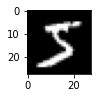

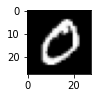

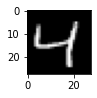

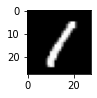

In [3]:
#load data and plot first 4 images
from keras.datasets import mnist
from matplotlib import pyplot
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X = train_X.astype(int), test_X.astype(int)
for i in range(4):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

# Preprocessing

In [4]:
# Here we have all the possible data formats required by our algorithms
train_x, test_x = Preprocessing.flatten_image(train_X, test_X)
train_x_norm, test_x_norm = Preprocessing.normalise_data(train_x, test_x)
train_y_one_hot = Preprocessing.one_hot_encode(train_y)
train_y_svm = Preprocessing.get_svc_output(train_y)

mikit vs scikit implementations. They are considered equal if their classification accuracies are within 0.5% of each other.

# K nearest neighbours

## scikit

In [5]:
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(train_x_norm, train_y)
sk_knn_predictions = sk_knn.predict(test_x_norm)
sk_knn.accuracy = 100*sum(sk_knn_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_knn.accuracy)) 

96.88%


## mikit

In [7]:
k, n_splits = 5, 4
mi_knn = MiKNeighboursClassifier(k, n_splits)
mi_knn.fit(train_x_norm, train_y)
mi_knn_predictions = mi_knn.predict(test_x_norm)
mi_knn.evaluate_predictions(mi_knn_predictions, test_y)
print('{}%.'.format(mi_knn.accuracy), mi_knn == sk_knn)

96.88%. True, mklearn's accuracy is the same as sklearn's.


# Multinomial logistic regression

## scikit

In [ ]:
sk_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
sk_logistic.fit(train_x_norm, train_y)
sk_logistic_predictions = sk_logistic.predict(test_x_norm)
sk_logistic.accuracy = 100*sum(sk_logistic_predictions == test_y)/test_y.shape[0]
print('{}%'.format(sk_logistic.accuracy))

92.58%


## mikit

In [ ]:
mi_logistic = MiLogisticClassifier()
mi_logistic.fit(train_x_norm, train_y_one_hot)
mi_logistic_predictions = mi_logistic.predict(test_x_norm)
mi_logistic.evaluate_predictions(mi_logistic_predictions, test_y)
print('{}%.'.format(mi_logistic.accuracy), mi_logistic == sk_logistic)

92.56%. True, mklearn's accuracy is just 0.02% lower than sklearn's.


# Support vector classifier

## scikit

In [ ]:
# SVCs don't scale too well with more training data so we use only 10000 points
n = 10000
sk_svc = SVC().fit(train_x_norm[0:n], train_y[0:n])
sk_svc_predictions = sk_svc.predict(test_x_norm)
sk_svc.accuracy = 100*sum(sk_svc_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_svc.accuracy))

95.94%


## mikit

In [ ]:
C, epsilon, tol, max_iter = 1.0, 2.5e-3, 1e-3, 300
mi_svc = MiSupportVectorClassifier(C, epsilon, tol, max_iter)
mi_svc.fit(train_x_norm[0:n], train_y_svm[:, 0:n])
mi_svc_predictions = mi_svc.predict(test_x_norm)
mi_svc.evaluate_predictions(mi_svc_predictions, test_y)
print('{}%.'.format(mi_svc.accuracy), mi_svc == sk_svc)

95.55%. True, mklearn's accuracy is just 0.39% lower than sklearn's.


# Decision tree

## scikit

In [ ]:
n = 10000
sk_tree = DecisionTreeClassifier(max_depth=20)
sk_tree.fit(train_x_norm[0:n], train_y[0:n])
sk_tree_predictions = sk_tree.predict(test_x_norm)
sk_tree.accuracy = 100*sum(sk_tree_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_tree.accuracy))

80.68%


## mikit

In [ ]:
max_depth, min_samples_split, min_gini = 20, 2, 1e-5
mi_tree = MiDecisionTreeClassifier(max_depth, min_samples_split, min_gini)
mi_tree.fit(train_x_norm[0:n], train_y_one_hot[0:n])
mi_tree_predictions = mi_tree.predict(test_x_norm)
mi_tree.evaluate_predictions(mi_tree_predictions, test_y)
print('{}%.'.format(mi_tree.accuracy), mi_tree == sk_tree)

80.91%. True, mklearn's accuracy is just 0.23% higher than sklearn's.


# Random forest

## scikit

In [ ]:
n = 10000
sk_forest = RandomForestClassifier(max_features=100, max_depth=20)
sk_forest.fit(train_x[0:n], train_y[0:n])
sk_forest_predictions = sk_forest.predict(test_x)
sk_forest.accuracy = 100*sum(sk_forest_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_forest.accuracy))

94.51%


## mikit

In [ ]:
n_trees, max_features, max_depth = 100, 100, 20 
min_samples_split, min_gini, n_jobs = 2, 1e-5, 2
mi_forest = MiRandomForestClassifier(n_trees, max_features, max_depth,
                                     min_samples_split, min_gini, n_jobs)
mi_forest.fit(train_x[0:n], train_y_one_hot[0:n])
mi_forest_predictions = mi_forest.predict(test_x)
mi_forest.evaluate_predictions(mi_forest_predictions, test_y)
print('{}%.'.format(mi_forest.accuracy), mi_forest == sk_forest)

94.13%. True, mklearn's accuracy is just 0.38% lower than sklearn's.


# PyTorch, MyTorch and TensorFlow imports

In [ ]:
import numpy as np
from torch import nn, no_grad, optim, float, Tensor
from torch.utils.data import DataLoader, TensorDataset

from MyTorch import MyMLP
from MyTorch import MyCNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomRotation, RandomTranslation, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization 

importing Jupyter notebook from MyTorch.ipynb


As before, MyTorch's implementation is considered equal to PyTorch's if their accuracies are within 0.5% of each other.

# Multilayer perceptron

## Set hyperparameters & Augment data

In [ ]:
epochs, batch_size, learning_rate, beta_1, beta_2 = 15, 16, 0.001, 0.9, 0.999
hidden_neurons_1, hidden_neurons_2 = 75, 25
input_neurons, output_neurons = train_X.shape[1]**2, train_y_one_hot.shape[1]

augment = Sequential([RandomTranslation(0.05, 0.05), RandomRotation(0.05)])
dataset = tf.data.Dataset.from_tensor_slices(train_X/255).batch(1)
aug = []
multiples_data = 2
for i in range(multiples_data):
  for d in dataset:
    aug.append(augment(d))
aug_data = np.array(aug).reshape(train_X.shape[0]*multiples_data, input_neurons)  
aug_y = np.vstack((train_y_one_hot, train_y_one_hot))

## PyTorch

In [ ]:
dataset = TensorDataset(Tensor(aug_data), Tensor(aug_y))
train_loader = DataLoader(dataset, batch_size=batch_size)
dataset = TensorDataset(Tensor(test_x_norm), Tensor(test_y))
test_loader = DataLoader(dataset, batch_size=batch_size)


class PyMLP(nn.Module):
    """PyTorch's Multilayer Perceptron."""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_neurons, hidden_neurons_1),
        nn.ReLU(),
        nn.Linear(hidden_neurons_1, hidden_neurons_2),
        nn.ReLU(),
        nn.Linear(hidden_neurons_2, output_neurons)
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)


pyMLP = PyMLP()
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(pyMLP.parameters())

def train(dataloader, model, optimiser):
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_function(pred, y)
        # Backpropagation
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

def test(dataloader, model):
    correct = 0
    with no_grad():
        for X, y in dataloader:
            pred = model(X)
            correct += (pred.argmax(1) == y).type(float).sum().item()
    correct /= len(dataloader.dataset)
    return 100*correct

for t in range(epochs):
    train(train_loader, pyMLP, optimiser)
pyMLP.accuracy = test(test_loader, pyMLP)
print(f'{pyMLP.accuracy:.2f}%')    

97.22%


## MyTorch

In [ ]:
layer_sizes = [input_neurons, hidden_neurons_1, hidden_neurons_2, output_neurons]
myMLP = MyMLP(epochs, batch_size, layer_sizes, learning_rate, beta_1, beta_2)
myMLP.fit(aug_data.T, aug_y.T)
predictions = myMLP.predict(test_x_norm)
myMLP.evaluate_predictions(predictions, test_y)
print(f'{myMLP.accuracy}%. ', myMLP == pyMLP)

97.47%.  True, MyTorch's accuracy is just 0.25% higher than PyTorch's.


## TensorFlow

In [ ]:
tfMLP = Sequential()
tfMLP.add(Dense(hidden_neurons_1, input_dim=input_neurons, activation='relu'))
tfMLP.add(Dense(hidden_neurons_2, 'relu'))
tfMLP.add(Dense(output_neurons, 'softmax'))
tfMLP.compile(loss='categorical_crossentropy', optimizer='adam')
tfMLP.fit(aug_data, aug_y, epochs=epochs, batch_size=batch_size, verbose=0)
pred = tfMLP.predict(test_x_norm)
tf_accuracy = 100*sum(np.argmax(np.array(pred), axis=1)==test_y)/test_y.shape[0]
print(f'{tf_accuracy}%')

97.41%


# Convolutional neural network

## PyTorch

In [ ]:
n_filters_1, n_filters_2, filter_size, n_dense = 8, 16, 5, 128
epochs, batch_size, learning_rate = 10, 32, 0.005

dataset = TensorDataset(Tensor(train_X.reshape(60000,1,28,28)), Tensor(train_y_one_hot))
train_loader = DataLoader(dataset, batch_size=batch_size)
dataset = TensorDataset(Tensor(test_X.reshape(10000,1,28,28)), Tensor(test_y))
test_loader = DataLoader(dataset, batch_size=batch_size)


class PyCNN(nn.Module):
    """PyTorch's convolutional neural network."""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Conv2d(1, n_filters_1, filter_size, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.BatchNorm2d(n_filters_1),
        nn.Conv2d(n_filters_1, n_filters_2, filter_size, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.BatchNorm2d(n_filters_2),
        nn.Flatten(),
        nn.Linear(n_filters_2 * 7 * 7, n_dense),
        nn.ReLU(),
        nn.BatchNorm1d(n_dense),
        nn.Linear(n_dense, 10)
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)


pyCNN = PyCNN()
loss_function = nn.CrossEntropyLoss()
optimiser = optim.SGD(pyCNN.parameters(), lr=learning_rate)
for t in range(epochs):
    train(train_loader, pyCNN, optimiser)
pyCNN.accuracy = test(test_loader, pyCNN)
print(f'{pyCNN.accuracy:.2f}%') 

98.88%


## MyTorch

In [ ]:
myCNN = MyCNN(epochs, batch_size, filter_size, n_filters_1, n_filters_2,
              n_dense, learning_rate)
myCNN.fit(train_X, train_y_one_hot.T)
predictions = myCNN.predict(test_X)
myCNN.evaluate_predictions(predictions, test_y)
print(f'{myCNN.accuracy}%. ', myCNN == pyCNN)

98.61%.  True, MyTorch's accuracy is just 0.27% lower than PyTorch's.


## TensorFlow

In [ ]:
tfCNN = Sequential()
tfCNN.add(Conv2D(n_filters_1, filter_size, padding='same', input_shape= (28,28,1), activation='relu'))
tfCNN.add(MaxPooling2D(2))
tfCNN.add(BatchNormalization())
tfCNN.add(Conv2D(n_filters_2, filter_size, padding='same', activation='relu'))
tfCNN.add(MaxPooling2D(2))
tfCNN.add(BatchNormalization())
tfCNN.add(Flatten())
tfCNN.add(Dense(n_dense, 'relu'))
tfCNN.add(BatchNormalization())
tfCNN.add(Dense(10, activation='softmax'))
tfCNN.compile(optimizer='sgd', loss='categorical_crossentropy')
tfCNN.fit(train_X[:,:,:,np.newaxis], train_y_one_hot, batch_size=batch_size, epochs=epochs, verbose=0)
pred = tfCNN.predict(test_X[:,:,:,np.newaxis])
tf_accuracy = 100*sum(np.argmax(np.array(pred), axis=1)==test_y)/test_y.shape[0]
print(f'{tf_accuracy}%')

99.09%


# Plotting accuracies

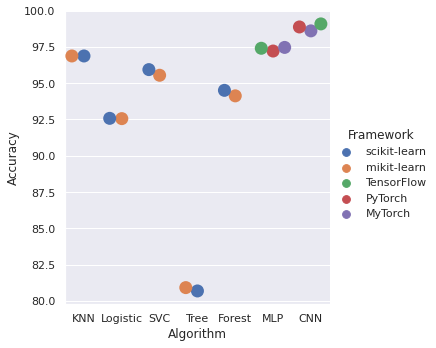

In [24]:
import pandas as pd
import seaborn as sns
sns.axes_style('darkgrid')

data = [['KNN', 96.88, 'scikit-learn'], 
        ['KNN', 96.88, 'mikit-learn'], 
        ['Logistic', 92.58, 'scikit-learn'],
        ['Logistic', 92.56, 'mikit-learn'],
        ['SVC', 95.94, 'scikit-learn'],
        ['SVC', 95.55, 'mikit-learn'],
        ['Tree', 80.68, 'scikit-learn'],
        ['Tree', 80.91, 'mikit-learn'],
        ['Forest', 94.51, 'scikit-learn'],
        ['Forest', 94.13, 'mikit-learn'],
        ['MLP', 97.41, 'TensorFlow'],
        ['MLP', 97.22, 'PyTorch'],
        ['MLP', 97.47, 'MyTorch'],
        ['CNN', 99.09, 'TensorFlow'],
        ['CNN', 98.88, 'PyTorch'],
        ['CNN', 98.61, 'MyTorch']]
df = pd.DataFrame(data, columns=['Algorithm', 'Accuracy', 'Framework'])

sns.catplot(x='Algorithm', y='Accuracy', hue='Framework', kind='swarm', s=13, data=df)